## Handling missing data

Missing values in a dataset can occur due to several reasons such as breakdown of measuring equipment, accidental removal of observations, lack of response by respondents, error on the part of the researcher, etc.

Let us read the dataset *GDP_missing_data.csv*, in which we have randomly removed some values, or put missing values in some of the columns. 

We'll also read *GDP_complete_data.csv*, in which we have not removed any values. We'll use this data later to assess the accuracy of our guess or estimate of missing values in *GDP_missing_data.csv*.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
gdp_missing_values_data = pd.read_csv('./Datasets/GDP_missing_data.csv')
gdp_complete_data = pd.read_csv('./Datasets/GDP_complete_data.csv')

In [2]:
gdp_missing_values_data.head()

,economicActivityFemale,country,lifeMale,infantMortality,gdpPerCapita,economicActivityMale,illiteracyMale,illiteracyFemale,lifeFemale,geographic_location,contraception,continent
0,7.2,Afghanistan,45.0,154.0,2474.0,87.5,NaN,85.0,46.0,Southern Asia,NaN,Asia
1,7.8,Algeria,67.5,44.0,11433.0,76.4,26.1,51.0,70.3,Northern Africa,NaN,Africa
2,41.3,Argentina,69.6,22.0,NaN,76.2,3.8,3.8,76.8,South America,NaN,South America
3,52.0,Armenia,67.2,25.0,13638.0,65.0,NaN,0.5,74.0,Western Asia,NaN,Asia
4,53.8,Australia,NaN,6.0,54891.0,NaN,1.0,1.0,81.2,Oceania,NaN,Oceania


Observe that the `gdp_missing_values_data` dataset consists of some missing values shown as NaN (Not a Number).

### Identifying missing values ([`isnull()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html))
Missing values in a Pandas DataFrame can be identified with the [`isnull()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) method. The Pandas Series object also consists of the [`isnull()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.isnull.html) method. For finding the number of missing values in each column of `gdp_missing_values_data`, we will sum up the missing values in each column of the dataset:

In [10]:
gdp_missing_values_data.isnull().sum()

economicActivityFemale    10
country                    0
lifeMale                  10
infantMortality           10
gdpPerCapita              10
economicActivityMale      10
illiteracyMale            10
illiteracyFemale          10
lifeFemale                10
geographic_location        0
contraception             71
continent                  0
dtype: int64

Note that the descriptive statistics methods associated with Pandas objects ignore missing values by default. Consider the summary statistics of `gdp_missing_values_data`:

In [23]:
gdp_missing_values_data.describe()

,economicActivityFemale,lifeMale,infantMortality,gdpPerCapita,economicActivityMale,illiteracyMale,illiteracyFemale,lifeFemale,contraception
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,84.000000
mean,45.935172,65.491724,37.158621,24193.482759,76.563448,13.570028,21.448897,70.615862,51.773810
std,16.875922,9.099256,34.465699,22748.764444,7.854730,16.497954,25.497045,9.923791,31.930026
min,1.900000,36.000000,3.000000,772.000000,51.200000,0.000000,0.000000,39.100000,0.000000
25%,35.500000,62.900000,10.000000,6837.000000,72.000000,1.000000,2.300000,67.500000,17.000000
50%,47.600000,67.800000,24.000000,15184.000000,77.300000,6.600000,9.720000,73.900000,65.000000
75%,55.900000,72.400000,54.000000,35957.000000,81.600000,19.500000,30.200000,78.100000,77.000000
max,90.600000,77.400000,169.000000,122740.000000,93.000000,70.500000,90.800000,82.900000,79.000000


Observe that the `count` statistics report the number of non-missing values of each column in the data, as the number of rows in the data (see code below) is more than the number of non-missing values of all the variables in the above table. Similarly, for the rest of the statistics, such as `mean`, `std`, etc., the missing values are ignored.

In [26]:
#The dataset gdp_missing_values_data has 155 rows
gdp_missing_values_data.shape[0]

155

### Types of missing values


Now that we know how to identify missing values in the dataset, let us learn about the types of missing values that can be there. @rubin1976inference classified missing values in three categories.

#### Missing Completely at Random (MCAR)
If the probability of being missing is the same for all cases, then the data are said to be missing completely at random. An example of MCAR is a weighing scale that ran out of batteries. Some of the data will be missing simply because of bad luck.

#### Missing at Random (MAR)
If the probability of being missing is the same only within groups defined by the observed data, then the data are missing at random (MAR). MAR is a much broader class than MCAR. For example, when placed on a soft surface, a weighing scale may produce more missing values than when placed on a hard surface. Such data are thus not MCAR. If, however, we know surface type and if we can assume MCAR within the type of surface, then the data are MAR

#### Missing Not at Random (MNAR)
MNAR means that the probability of being missing varies for reasons that are unknown to us. For example, the weighing scale mechanism may wear out over time, producing more missing data as time progresses, but we may fail to note this. If the heavier objects are measured later in time, then we obtain a distribution of the measurements that will be distorted. MNAR includes the possibility that the scale produces more missing values for the heavier objects (as above), a situation that might be difficult to recognize and handle.

*Source: https://stefvanbuuren.name/fimd/sec-MCAR.html*

### Practice exercise 1

#### 
In which of the above scenarios can we ignore the observations corresponding to missing values without the risk of skewing the analysis/trends in the data?

#### 
In which of the above scenarios will it be the more risky to impute or estimate missing values?

#### 
For the datset consisting of GDP per capita, think of hypothetical scenarios in which the missing values of GDP per capita can correspond to MCAR / MAR / MNAR.

### Dropping observations with missing values ([`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html))
Sometimes our analysis requires that there should be no missing values in the dataset. For example, while building statistical models, we may require the values of all the predictor variables. The quickest way is to use the `dropna()` method, which drops the observations that even have a single missing value, and leaves only complete observations in the data.

Let us drop the rows containing even a single value from `gdp_missing_values_data`.

In [30]:
gdp_no_missing_data = gdp_missing_values_data.dropna()

In [31]:
#Shape of gdp_no_missing_data
gdp_no_missing_data.shape

(42, 12)

Dropping rows with even a single missing value has reduced the number of rows from 155 to 42! However, earlier we saw that all the columns except `contraception` had at most 10 missing values. Removing all rows / columns with even a single missing value results in loss of data that is non-missing in the respective rows/columns. Thus, it is typically a bad idea to drop observations with even a single missing value, except in cases where we have a very small number of missing-value observations.

If a few values of a column are missing, we can possibly estimate them using the rest of the data, so that we can (hopefully) maximize the information that can be extracted from the data. However, if most of the values of a column are missing, it may be harder to estimate its values.

In this case, we see that around 50% values of the `contraception` column is missing. Thus, we'll drop the column as it may be hard to impute its values based on a relatively small number of non-missing values.

In [3]:
#Deleting column with missing values in almost half of the observations
gdp_missing_values_data.drop(['contraception'],axis=1,inplace=True)
gdp_missing_values_data.shape

(155, 11)

### Some methods to impute missing values
There are an unlimited number of ways to impute missing values. Some imputation methods are provided in the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).

The best way to impute them will depend on the problem, and the assumptions taken. Below are just a few examples.



#### Method 1: Naive Method
Filling the missing value of a column by copying the value of the previous non-missing observation.

In [37]:
#Filling missing values: Method 1- Naive way
gdp_imputed_data = gdp_missing_values_data.fillna(method = 'ffill')

In [42]:
#Checking if any missing values are remaining
gdp_imputed_data.isnull().sum()

economicActivityFemale    0
country                   0
lifeMale                  0
infantMortality           0
gdpPerCapita              0
economicActivityMale      0
illiteracyMale            1
illiteracyFemale          0
lifeFemale                0
geographic_location       0
continent                 0
dtype: int64

After imputing missing values, note there is still one missing value for *illiteracyMale*. Can you guess why one missing value remained?

Let us check how good is this method in imputing missing values. We'll compare the imputed values of `gdpPerCapita` with the actual values. Recall that we had randomly put some missing values in `gdp_missing_values_data`, and we have the actual values in `gdp_complete_data`.

In [23]:
#Index of rows with missing values for GDP per capita
null_ind_gdpPC = gdp_missing_values_data.index[gdp_missing_values_data.gdpPerCapita.isnull()]

In [24]:
#Defining a function to plot the imputed values vs actual values 
def plot_actual_vs_predicted():
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15) 
    x = gdp_complete_data.loc[null_ind_gdpPC,'gdpPerCapita']
    y = gdp_imputed_data.loc[null_ind_gdpPC,'gdpPerCapita']
    plt.scatter(x,y)
    z=np.polyfit(x,y,1)
    p=np.poly1d(z)
    plt.plot(x,x,color='orange')
    plt.xlabel('Actual GDP per capita',fontsize=20)
    plt.ylabel('Imputed GDP per capita',fontsize=20)
    ax.xaxis.set_major_formatter('${x:,.0f}')
    ax.yaxis.set_major_formatter('${x:,.0f}')
    rmse = np.sqrt(((x-y).pow(2)).mean())
    print("RMSE=",rmse)

RMSE= 34843.91091137732


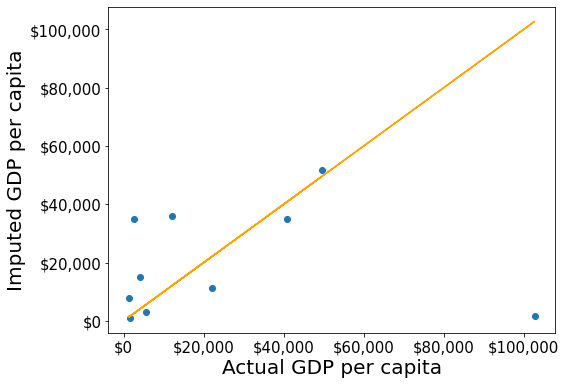

In [92]:
#Plot comparing imputed values with actual values, and computing the Root mean square error (RMSE) of the imputed values
plot_actual_vs_predicted()

We observe that the accuracy of imputation is poor as GDP per capita can vary a lot across countries, and the data is not sorted by GDP per capita. There is no reason why the GDP per capita of a country should be close to the GDP per capita of the country in the observation above it.

#### Method 2: Imputing missing values as the mean of non-missing values
Let us impute missing values in the column as the average of the non-missing values of the column. The sum of squared differences between actual values and the imputed values is likely to be smaller if we impute using the mean. However, this may not be true in cases other than MCAR (Missing completely at random).

In [9]:
#Filling missing values: Method 2
gdp_imputed_data = gdp_missing_values_data.fillna(gdp_missing_values_data.mean())

RMSE= 30793.549983587087


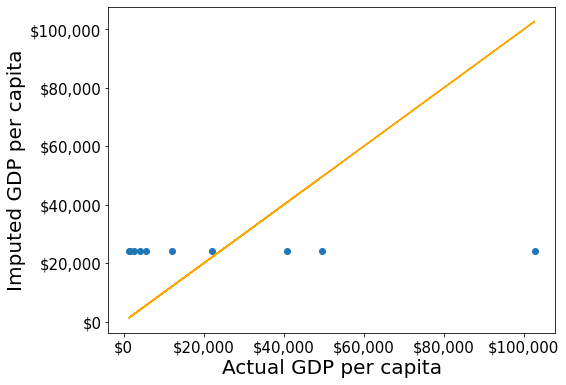

In [10]:
plot_actual_vs_predicted()

Although this method of imputation doesn't seem impressive, the RMSE of the estimates is lower than that of the naive method. Since we had introduced missing values randomly in `gdp_missing_values_data`, the mean GDP per capita will be the closest constant to the GDP per capita values, in terms of squared error.

#### Method 3: Imputing missing values based on correlated variables in the data

If a variable is highly correlated with another variable in the dataset, we can approximate its missing values using the trendline with the highly correlated variable.

Let us visualize the distribution of GDP per capita for different continents.

<AxesSubplot:xlabel='continent', ylabel='gdpPerCapita'>

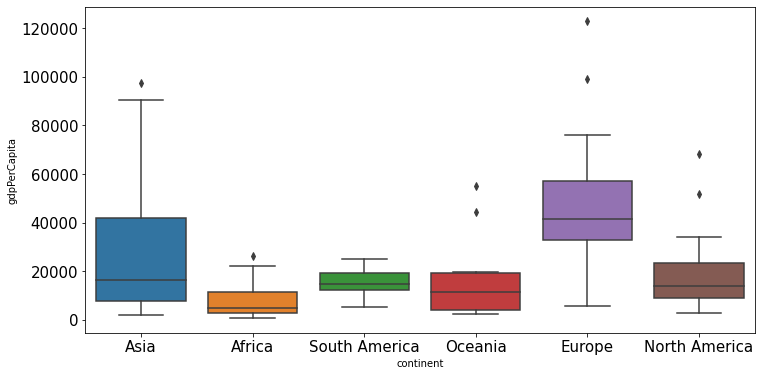

In [102]:
plt.rcParams["figure.figsize"] = (12,6)
sns.boxplot(x = 'continent',y='gdpPerCapita',data = gdp_missing_values_data)

We observe that there is a distinct difference between the GDPs per capita of some of the contents. Let us impute the missing GDP per capita of a country as the mean GDP per capita of the corresponding continent. This imputation should be better than imputing the missing GDP per capita as the mean of all the non-missing values, as the GDP per capita of a country is likely to be closer to the mean GDP per capita of the continent, rather the mean GDP per capita of the whole world.

In [2]:
#Finding the mean GDP per capita of the continent - please differ the understanding of this code to chapter 9.
avg_gdpPerCapita = gdp_missing_values_data['gdpPerCapita'].groupby(gdp_missing_values_data['continent']).mean()
avg_gdpPerCapita

continent
Africa            7638.178571
Asia             25922.750000
Europe           45455.303030
North America    19625.210526
Oceania          15385.857143
South America    15360.909091
Name: gdpPerCapita, dtype: float64

In [46]:
#Creating a copy of missing data to impute missing values
gdp_imputed_data = gdp_missing_values_data.copy()

RMSE= 25473.20645170116


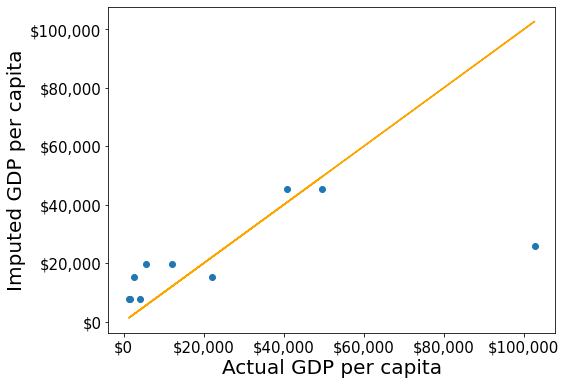

In [48]:
#Replacing missing GDP per capita with the mean GDP per capita for the corresponding continent
for cont in avg_gdpPerCapita.index:
    gdp_imputed_data.loc[(gdp_imputed_data.continent==cont) & (gdp_imputed_data.gdpPerCapita.isnull()),
                     'gdpPerCapita']=avg_gdpPerCapita[cont]
plot_actual_vs_predicted()

Note that the imputed values are closer to the actual values, and the RMSE has further reduced as expected.

#### Practice exercise 2
Find the numeric variable most strongly correlated with GDP per capita, and use it to impute its missing values. Find the RMSE of the imputed values.

In [123]:
#| eval: false
#| echo: false

#Let us identify the variable highly correlated with GDP per capita.
gdp_missing_values_data.corrwith(gdp_missing_values_data.gdpPerCapita)
#The variable *lifeFemale* has the strongest correlation with GDP per capita. Let us use it to impute missing values of GDP per capita.
x = gdp_missing_values_data.lifeFemale
y = gdp_missing_values_data.gdpPerCapita
idx_non_missing = np.isfinite(x) & np.isfinite(y)
slope_intercept_trendline = np.polyfit(x[idx_non_missing],y[idx_non_missing],1)   #Finding the slope and intercept for the trendline
compute_y_given_x = np.poly1d(slope_intercept_trendline)
#Creating a copy of missing data to impute missing values
gdp_imputed_data = gdp_missing_values_data.copy()
gdp_imputed_data.loc[null_ind_gdpPC,'gdpPerCapita']=compute_y_given_x(gdp_missing_values_data.loc[null_ind_gdpPC,'lifeFemale'])
plot_actual_vs_predicted()

#### Method 4: KNN: K-nearest neighbor

In this method, we'll impute the missing value of the variable as the mean value of the $K$-nearest neighbors having non-missing values for that variable. The neighbors to a data-point are identified based on their Euclidean distance to the point in terms of the standardized values of rest of the variables in the data.

Let's consider a toy example to understand missing value imputation by KNN. Suppose we have to impute missing values in a toy dataset, named as `toy_data` having 4 observations and 3 variables.

In [66]:
#Toy example - A 4x3 array with missing values
nan = np.nan
toy_data = np.array([[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]])
toy_data

array([[ 1.,  2., nan],
       [ 3.,  4.,  3.],
       [nan,  6.,  5.],
       [ 8.,  8.,  7.]])

We'll use some functions from the *sklearn* library to perform the KNN imputation. It is much easier to directly use the algorithm from *sklearn*, instead of coding it from scratch.

In [67]:
#Library to compute pair-wise Euclidean distance between all observations in the data
from sklearn import metrics

#Library to impute missing values with the KNN algorithm
from sklearn import impute

We'll use the *sklearn* function [nan_euclidean_distances()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.nan_euclidean_distances.html) to compute the Euclidean distance between all pairs of observations in the data.

In [69]:
#This is the distance matrix containing the distance of the ith observation from the jth observation at the (i,j) position in the matrix
metrics.pairwise.nan_euclidean_distances(toy_data,toy_data)

array([[ 0.        ,  3.46410162,  6.92820323, 11.29158979],
       [ 3.46410162,  0.        ,  3.46410162,  7.54983444],
       [ 6.92820323,  3.46410162,  0.        ,  3.46410162],
       [11.29158979,  7.54983444,  3.46410162,  0.        ]])

Note that the size of the above matrix is 4x4. This is because the $(i,j)^{th}$ element of the matrix is the distance of the $i^{th}$ observation from the $j^{th}$ observation. The matrix is symmetric because the distance of $i^{th}$ observation to the $j^{th}$ observation is the same as the distance of the $j^{th}$ observation to the $i^{th}$ observation.

We'll use the *sklearn* function [KNNImputer()](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) to impute the missing value of a column in `toy_data` as the mean of the values of the $K$ nearest neighbors to the observation that have non-missing values for that column.

Let us impute the missing values in `toy_data` using the values of $K=2$ nearest neighbors from the corresponding observation.

In [71]:
#imputing missing values with 2 nearest neighbors, where the neighbors have equal weights

#Define an object of type KNNImputer
imputer = impute.KNNImputer(n_neighbors=2)

#Use the object method 'fit_transform' to impute missing values
imputer.fit_transform(toy_data)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

The third observation was the closest to the $2nd$ and $4th$ observations based on the Euclidean distance matrix. Thus, the missing value in the $3rd$ row of the `toy_data` has been imputed as the mean of the values in the $2nd$ and $4th$ observations for the corresponding column. Similarly, the $1st$ observation is the closest to the $2nd$ and $3rd$ observations. Thus the missing value in the $1st$ row of `toy_data` has been imputed as the mean of the values in the $1st$ and $2nd$ observations for the corresponding column.

Let us use KNN to impute the missing values of `gdpPerCapita` in `gdp_missing_values_data`. We'll use only the numeric columns of the data in imputing the missing values. Also, we'll ignore `contraception` as it has a lot of missing values, and thus may not be useful.

In [133]:
#Considering numeric columns in the data to use KNN
num_cols = list(range(0,1))+list(range(2,9))
num_cols

[0, 2, 3, 4, 5, 6, 7, 8]

Before computing the pair-wise Euclidean distance of observations, we must standardize the data so that all columns are at the same scale. This will avoid columns with a higher magnitude of values having a higher weight in determining the Euclidean distance. Unless there is a reason to give a higher weight to a column, we assume all columns to have the same weight in the Euclidean distance computation.

We can use the code below to scale the data. However, after imputing the missing values, the data is to be scaled back to the original scale, so that each variable is in the same units as in the original dataset. However, if the code below is used, we'll lose the orginal scale of each of the columns.

In [77]:
#Scaling data to compute equally weighted distances from the 'k' nearest neighbors
scaled_data = gdp_missing_values_data.iloc[:,num_cols].apply(lambda x:(x-x.min())/(x.max()-x.min()))

To alleviate the problem of losing the orignial scale of the data, we'll use the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) object of the *sklearn* library. The object will store the original scale of the data, which will help transform the data back to the original scale once the missing values have been imputed in the standardized data.

In [82]:
# Scaling data - using sklearn

#Create an object of type MinMaxScaler
scaler = sk.preprocessing.MinMaxScaler()

#Use the object method 'fit_transform' to scale the values to a standard uniform distribution
scaled_data = pd.DataFrame(scaler.fit_transform(gdp_missing_values_data.iloc[:,num_cols]))

In [99]:
#Imputing missing values with KNNImputer

#Define an object of type KNNImputer
imputer = impute.KNNImputer(n_neighbors=3, weights="uniform")

#Use the object method 'fit_transform' to impute missing values
imputed_arr = imputer.fit_transform(scaled_data)

In [100]:
#Scaling back the scaled array to obtain the data at the original scale

#Use the object method 'inverse_transform' to scale back the values to the original scale of the data
unscaled_data = scaler.inverse_transform(imputed_arr)

In [101]:
#Note the method imputes the missing value of all the columns
#However, we are interested in imputing the missing values of only the 'gdpPerCapita' column
gdp_imputed_data = gdp_missing_values_data.copy()
gdp_imputed_data.loc[:,'gdpPerCapita'] = unscaled_data[:,3]

RMSE= 16804.195967740387


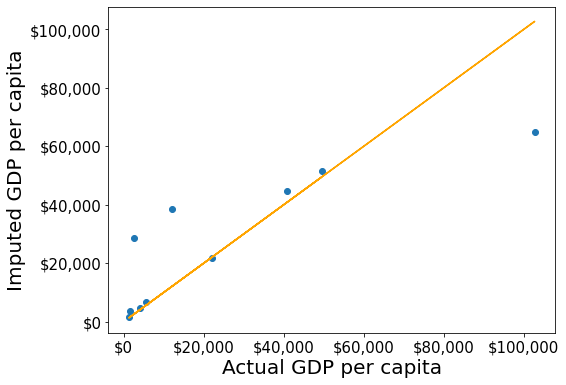

In [102]:
#Visualizing the accuracy of missing value imputation with KNN
plot_actual_vs_predicted()

Note that the RMSE is the lowest in this method. It is because this method imputes missing values as the average of the values of "similar" observations, which is smarter and more robust than the previous methods.

We chose $K=3$ in the missing value imputation for GDP per capita. However, the value of $K$ is typically chosen using a method known as cross validation. We'll learn about cross-validation in the next course of the sequence.

## Data binning
Data binning is a method to group values of a continuous / categorical variable into bins (or categories). Binning may help with 

(i) Better intepretation of data \
(ii) Making better recommendations \
(iii) Smooth data, reduce noise

Examples:

**Binning to better interpret data**

1. The number of flu cases everyday may be binned to seasons such as fall, spring, winter and summer, to understand the effect of season on flu.

**Binning to make recommendations:** 

2. A doctor may like to group patient age into bins. Grouping patient ages into categories such as Age <=12, 12<Age<=18, 18<Age<=65, Age>65 may help recommend the kind/doses of covid vaccine a patient needs.

3. A credit card company may want to bin customers based on their spend, as "High spenders", "Medium spenders" and "Low spenders". Binning will help them design customized marketing campaigns for each bin, thereby increasing customer response (or revenue). On the other hand, they use the same campaign for customers withing the same bin, thus minimizng marketing costs.

**Binning to smooth data, and reduce noise** 

4. A sales company may want to bin their total sales to a weekly / monthly / yearly level to reduce the noise in day-to-day sales. 


**Example:** The dataset *College.csv* contains information about US universities. The description of variables of the dataset can be found on page 54 of this [book](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf). Let's see if we can apply binning to better interpret the association of instructional expenditure per student (`Expend`) with graduation rate (`Grad.Rate`) for US universities, and make recommendations.

In [129]:
college = pd.read_csv('./Datasets/College.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


To visualize the association between two numeric variables, we typically make a scatterplot. Let us make a scatterplot of graduation rate with expenditure per student, with a trendline.

Text(0, 0.5, 'Graduation rate')

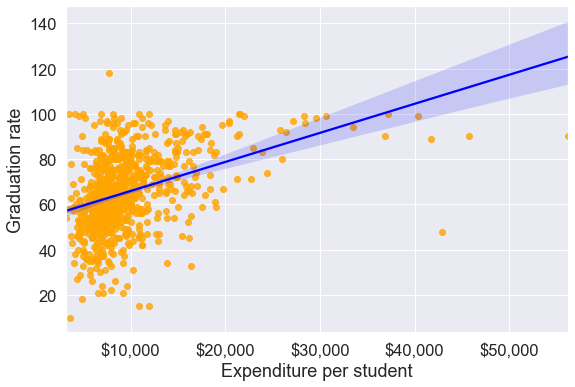

In [116]:
#Let's make a scatterplot of 'Grad.Rate' vs 'Expend' with a trendline, to visualize any trend(s).
sns.set(font_scale=1.5)
ax=sns.regplot(data = data, x = "Expend", y = "Grad.Rate",scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
ax.xaxis.set_major_formatter('${x:,.0f}')
ax.set_xlabel('Expenditure per student')
ax.set_ylabel('Graduation rate')

The trendline indicates a positive correlation between `Expend` and `Grad.Rate`. However, there seems to be a lot of noise and presence of outliers in the data, which makes it hard to interpret the overall trend.

We'll bin `Expend` to see if we can better analyze its association with `Grad.Rate`. However, let us first visualize the distribution of `Expend`.

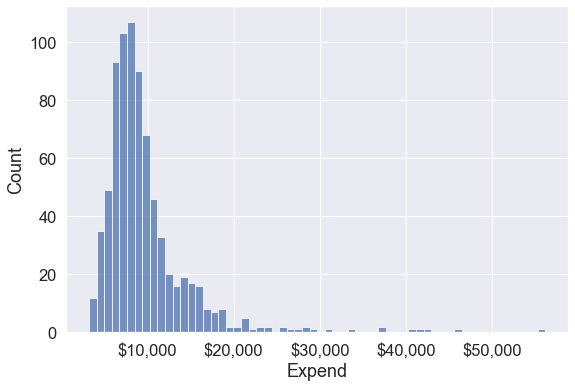

In [118]:
#Visualizing the distribution of expend
ax=sns.histplot(data = data, x= 'Expend')
ax.xaxis.set_major_formatter('${x:,.0f}')

The distribution of `Extend` is right skewed with potentially some extremely high outlying values.

### Binning with equal width bins

We'll use the Pandas function [cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) to bin `Expend`. This function creates bins such that all bins have the same width.

In [119]:
#Using the cut() function in Pandas to bin "Expend"
Binned_expend = pd.cut(data['Expend'],3,retbins = True)
Binned_expend

(0      (3132.953, 20868.333]
 1      (3132.953, 20868.333]
 2      (3132.953, 20868.333]
 3      (3132.953, 20868.333]
 4      (3132.953, 20868.333]
                ...          
 772    (3132.953, 20868.333]
 773    (3132.953, 20868.333]
 774    (3132.953, 20868.333]
 775     (38550.667, 56233.0]
 776    (3132.953, 20868.333]
 Name: Expend, Length: 777, dtype: category
 Categories (3, interval[float64]): [(3132.953, 20868.333] < (20868.333, 38550.667] < (38550.667, 56233.0]],
 array([ 3132.953     , 20868.33333333, 38550.66666667, 56233.        ]))

The [cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) function returns a tuple of length 2. The first element of the tuple are the bins, while the second element is an array containing the cut-off values for the bins.

In [124]:
type(Binned_expend)

tuple

In [125]:
len(Binned_expend)

2

Once the bins are obtained, we'll add a column in the dataset that indicates the bin for `Expend`.

In [130]:
#Creating a categorical variable to store the level of expenditure on a student
college['Expend_bin'] = Binned_expend[0]
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Expend_bin
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,"(3132.953, 20868.333]"
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,"(3132.953, 20868.333]"
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,"(3132.953, 20868.333]"
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,"(3132.953, 20868.333]"
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,"(3132.953, 20868.333]"


See the variable `Expend_bin` in the above dataset.

Let us visualize the `Expend` bins over the distribution of the `Expend` variable.

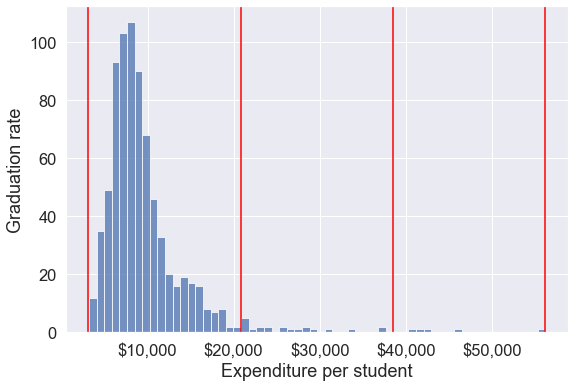

In [145]:
#Visualizing the bins for instructional expediture on a student
ax=sns.histplot(data = college, x= 'Expend')
for i in range(4):
    plt.axvline(Binned_expend[1][i], 0,100,color='red')
plt.xlabel('Expenditure per student');
plt.ylabel('Graduation rate');
ax.xaxis.set_major_formatter('${x:,.0f}')

By default, the bins created have equal width. They are created by dividing the range between the maximum and minimum value of `Expend` into the desired number of equal-width intervals. We can label the bins as well as follows.

In [148]:
college['Expend_bin'] = pd.cut(college['Expend'],3,labels = ['Low expend','Med expend','High expend'])
college['Expend_bin']

0       Low expend
1       Low expend
2       Low expend
3       Low expend
4       Low expend
          ...     
772     Low expend
773     Low expend
774     Low expend
775    High expend
776     Low expend
Name: Expend_bin, Length: 777, dtype: category
Categories (3, object): ['Low expend' < 'Med expend' < 'High expend']

Now that we have binned the variable `Expend`, let us see if we can better visualize the association of graduation rate with expenditure per student using `Expened_bin`.

<AxesSubplot:xlabel='Expend_bin', ylabel='Grad.Rate'>

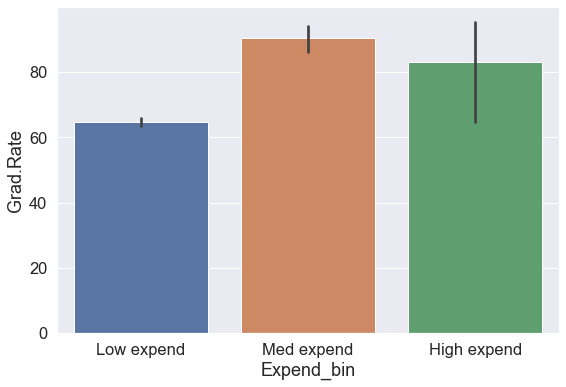

In [152]:
#Visualizing average graduation rate vs categories of instructional expenditure per student
sns.barplot(x = 'Expend_bin', y = 'Grad.Rate', data = college)

It seems that the graduation rate is the highest for universities with medium level of expenditure per student. This is different from the trend we saw earlier in the scatter plot. Let us investigate.

Let us find the number of universities in each bin.

In [155]:
pd.value_counts(college['Expend_bin'])

Low expend     751
Med expend      21
High expend      5
Name: Expend_bin, dtype: int64

The bin `High expend` consists of only 5 universities, or 0.6% of all the universities in the dataset. These universities may be outliers that are skewing the trend (as also evident in the histogram above). 

In such cases, we should bin observations such that all bins are of equal size, i.e., they have the same number of observations.

### Binning with equal sized bins

Let us bin the variable `Expend` such that each bin consists of the same number of observations.

We'll use the Pandas function [qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) to make equal-sized bins (in contrast to equal-width bins in the previous section).

In [156]:
#Using the Pandas function qcut() to create bins with the same number of observations
Binned_expend = pd.qcut(data['Expend'],3,retbins = True)
college['Expend_bin'] = Binned_expend[0]

Each bin has the same number of observations with `qcut()`:

In [158]:
pd.value_counts(college['Expend_bin'])

(3185.999, 7334.333]    259
(7334.333, 9682.333]    259
(9682.333, 56233.0]     259
Name: Expend_bin, dtype: int64

Let us visualize the `Expend` bins over the distribution of the `Expend` variable.

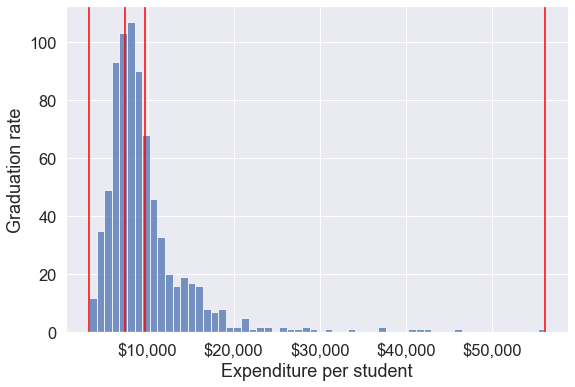

In [159]:
#Visualizing the bins for instructional expediture on a student
ax=sns.histplot(data = college, x= 'Expend')
for i in range(4):
    plt.axvline(Binned_expend[1][i], 0,100,color='red')
plt.xlabel('Expenditure per student');
plt.ylabel('Graduation rate');
ax.xaxis.set_major_formatter('${x:,.0f}')

Note that the bin-widths have been adjusted to have the same number of observations in each bin. The bins are narrower in domains of high density, and wider in domains of sparse density.

Let us again make the barplot visualizing the average graduate rate with level of instructional expenditure per student.

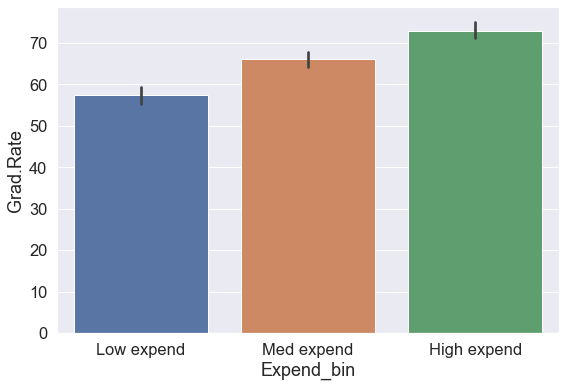

In [161]:
college['Expend_bin'] = pd.qcut(college['Expend'],3,labels = ['Low expend','Med expend','High expend'])
a=sns.barplot(x = 'Expend_bin', y = 'Grad.Rate', data = college)

Now we see the same trend that we saw in the scatterplot, but without the noise. We have smoothed the data. Note that making equal-sized bins helps reduce the effect of outliers in the overall trend.

Suppose this analysis was done to provide recommendations to universities for increasing their graduation rate. With binning, we can can provide one recommendation to "Low expend" universities, and another one to "Med expend" universities. For example, the recommendations can be: 

1. "Low expend" universities can expect an increase of 9 percentage points in `Grad.Rate`, if they migrate to the "Med expend" category.
2. "Med expend" universities can expect an increase of 7 percentage points in `Grad.Rate`, if they migrate to the "High expend" category.

The numbers in the above recommendations are based on the table below.

In [162]:
college['Grad.Rate'].groupby(college.Expend_bin).mean()

Expend_bin
Low expend     57.343629
Med expend     66.057915
High expend    72.988417
Name: Grad.Rate, dtype: float64